<div style="background-color:#035FCA; color:#19180F; font-size:40px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> Electra </div>

<div style="background-color:#568FD1; color:#19180F; font-size:30px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">🔧Architecture Overview⚙️
 </div>
 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">

It is a neural network architecture that belongs to the hierarchy of transformers family.<br>

The building blocks of Electra is explained below<br>

1. Transformer architecture - Similar to other models like BERT, GPT2, It is built upon the transformer architecture which utilize self attention mechanisms to capture the relationships b/w words in a sentence and enable parallel procesing.<br>

2. Pre-training and Fine tuning : Like BERT and GPT2, Electra also follows a two step process. It undergoes pre-training and fine-tuning. In the pre-training phase, the model is trained over a large corpus of unlabeled text to learn the language patterns and representations. In the fine tuning phase, the model is further trained on a smaller labeled dataset for specific downstream tasks like text classification or NER.<br>

3. Masked Language Modelling vs. Discriminative Training : In BERT, a technique known as MLM is used where random words are masked and the model is asked to predict them. In contrast, Electra employs Discriminative training. Instead of masking words, It replaces some of them with plausible alternatives and tasks the model with distinguishing the original word from the replacement. This way, Electra learns to discriminate b/w real and generated tokens resulting in more efficient training.<br>

4. Generator and Discriminator: Electra consists of two components, The generator and the discriminator. The generator takes in a sentence as input and tries to predict the replaced words whereas the discriminator aims to determine whether the replaced words are real or generated. These two components work in synchronicity during training with the Discriminator providing feedback to improve generator's performance.
<br>
5. Model size and training efficiency- Electra is designed to be computationally more efficient compared to some other models. For instance, models like BERT and GPT2 are known for their large size, which makes training and deployment challenging. Electra whreas achieves similar performance with smaller memory footprints.<br>

    <b> Key differences in the architecture of Electra and other models.</b><br>

- With respect to ALBERT : ALBERT uses parameter sharing to reduce model size and training time whreas Electra although smaller, focuses on the Discriminative Training approach for efficiency.<br>

- With respect to ROBERTA- ROBERTA uses large batch size and corpus to train but Electra achieves similar performance with smaller resources.<br>

- With respect to T5 - T5 is a versatile model for various NLP tasks while Electra's fine tuning also makes it capable for a wide number of NLP tasks.<br>
<div>

<div style="background-color:#568FD1; color:#19180F; font-size:30px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 🏢 Architecture Diagram.
 </div>
<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">

1. Input Layer: The architecture is given input tokens that reflect the input sequence.<br>

2. Encoder Layers: After that, the input tokens are routed via a number of encoder layers. Each encoder layer is made up of the following elements:<br>

   a. Self-Attention Mechanism: This component uses self-attention operations to detect relationships between distinct places in the input tokens. It is made up of three vectors: query (Q), key (K), and value (V). The self-attention mechanism computes attention scores for each token in respect to all other tokens, allowing it to balance the significance of each token's information in relation to the others. This component aids the model in comprehending the context and connections between various tokens.<br>

   b. Feed-Forward Neural Network (FFNN): The output is sent via a feed-forward neural network after self-attention. This network is made up of numerous completely linked layers that alter and enhance token representations. To capture complicated patterns and relationships in data, the FFNN employs non-linear transformations.<br>

   c. Add and Normalise: The self-attention mechanism and feed-forward neural network outputs are added element by element, followed by a layer normalisation procedure. This technique aids in the stabilisation of the training process by integrating the learnt representations from both components and normalising the outputs.<br>

   The methods outlined above are repeated for each encoder layer in the architecture, allowing the model to capture increasingly sophisticated and abstract representations of the input sequence.<br>

3. Output Layer: The final output tokens are acquired once the input tokens have been processed through all of the encoder levels. The improved and altered representations of the input sequence are represented by these output tokens.<br>

The diagram's linkages between components depict the flow of information and transformations that occur in the Electra Transformer architecture. The input tokens are embedded initially and then transmitted via numerous encoder layers, which perform self-attention, feed-forward neural networks, and normalisation operations. Finally, the revised representations are fed into a linear mapping to generate the output tokens.<br>

</div>




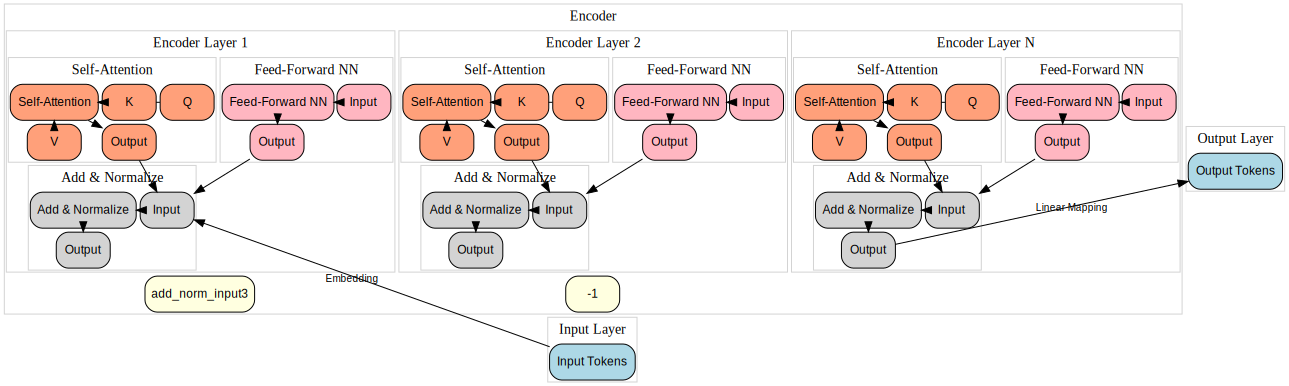

In [19]:
from IPython.display import SVG, display

# Load the SVG file and display it
svg_file = '/kaggle/input/notebook-images/electra.svg'
display(SVG(filename=svg_file))

 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Extracting the train and test sets using 7z command line tool</div>

In [1]:
!7z x /kaggle/input/mercari-price-suggestion-challenge/test.tsv.7z
!7z x /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/mercari-price-suggestion-challenge                                                          1 file, 35617013 bytes (34 MiB)

Extracting archive: /kaggle/input/mercari-price-suggestion-challenge/test.tsv.7z
--
Path = /kaggle/input/mercari-price-suggestion-challenge/test.tsv.7z
Type = 7z
Physical Size = 35617013
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

      8% - test.ts               14% - test.ts               21% - test.ts               32% - test.ts               40% - test.ts               48% - test.ts               57% - test.ts               64% - test.ts               73% - test.ts               81% - test.ts               87% - test.ts               94% - test.ts              Everything is Ok

Size:       15422216

 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
This code snippet imports the necessary libraries and modules for deep learning model training using Electra.</div>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import ElectraTokenizer, ElectraForSequenceClassification


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso


 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
These lines of code set the random seed for reproducibility.</div>

In [3]:
# Set the random seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
These lines of code load the train and test sets</div>

In [4]:
# Load the training and test data
train_df = pd.read_csv('/kaggle/working/train.tsv', delimiter='\t')
test_df = pd.read_csv('/kaggle/working/test.tsv', delimiter='\t')


 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Removing rows with missing values </div>

In [5]:
train_df = train_df.dropna()


 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Split the data into training and validation sets
 </div>

In [6]:
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=seed)


 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Defining the tokenizer
 </div>

In [7]:
tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator')


 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Function to tokenize the data
 </div>

In [8]:
def tokenize_data(text):
    return tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=256,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Creating dataset class for training and validation split </div>

In [9]:
class MercariDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        text = row['name'] + ' ' + row['item_description']
        inputs = tokenize_data(text)
        label = row['price']
        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'label': torch.tensor(label, dtype=torch.float32)
        }


 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Defining batch size and dataloaders </div>

In [10]:
batch_size = 32
train_dataset = MercariDataset(train_data)
val_dataset = MercariDataset(val_data)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)

 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Performing sanity check of the dataloaders </div>

In [11]:
for batch in train_loader:
    print(batch)
    break

{'input_ids': tensor([[  101,  2417,  2152,  ...,     0,     0,     0],
        [  101,  6954,  2072,  ...,     0,     0,     0],
        [  101, 21994, 19457,  ...,     0,     0,     0],
        ...,
        [  101,  2047,  2141,  ...,     0,     0,     0],
        [  101,  1038,  2989,  ...,     0,     0,     0],
        [  101,  9212,  2884,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 46.,   3.,  30.,  37.,  20.,  17.,  10.,  31.,  10., 895.,  19.,  61.,
         14.,  96.,  90.,  23.,  13.,  74.,  19.,  26., 525.,  41.,   8.,  11.,
         24.,  16.,  30.,  46.,  20.,  20.,  26.,  50.])}


 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Instantiating the Electra model </div>

In [12]:
model = ElectraForSequenceClassification.from_pretrained('google/electra-base-discriminator', num_labels=1)

Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.o

 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Defining the loss function and optimizer </div>

In [13]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Checking the length of dataloaders to estimate number of steps per epoch </div>

In [14]:
len(train_loader), len(val_loader)

(21175, 5294)

 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
This code block trains a model using a loop that iterates over a specified number of epochs. It uses the tqdm library to display a progress bar during training. The model is trained on a GPU if available; otherwise, it falls back to CPU.<br>

Within each epoch, the code iterates over the train_loader to process batches of training data. It moves the input data and labels to the appropriate device (GPU or CPU) and performs forward and backward passes through the model. The optimizer is used to update the model's parameters based on the computed gradients. The training loss is accumulated and averaged over the entire training dataset.<br>

After each epoch's training, the code enters the evaluation phase on the validation set (val_loader). It iterates over the validation batches, performs forward passes through the model, and calculates the loss. The validation loss is accumulated and averaged over the entire validation dataset.<br>

At the end of each epoch, the code prints the epoch number, the training loss, and the validation loss.<br></div>

In [15]:
from tqdm import tqdm

# Train the model
num_epochs = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    
    for step,batch in tqdm(enumerate(train_loader)):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        
        optimizer.zero_grad()
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        print(step)
        if step%500==0:
            print("Step-{}, Loss-{}".format(step,loss.item()))
            break # breaking the training at 500th step since 1 iteration may take around 5 hrs, Uncomment this during full training
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * input_ids.size(0)
    
    train_loss /= len(train_dataset)
    
    # Evaluate on the validation set
    model.eval()
    val_loss = 0.0
    
    with torch.no_grad():
        for step,batch in tqdm(enumerate(val_loader)):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            
            val_loss += loss.item() * input_ids.size(0)
    
    val_loss /= len(val_dataset)
    
    print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}')

#intentional keyboard interrupt since training will take long, Train more as per your need.

0it [00:01, ?it/s]


0
Step-0, Loss-1081.6334228515625


2592it [13:08,  3.29it/s]


KeyboardInterrupt: 

 <div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
The code provided is used to generate predictions on the test set using a pre-trained model and create a submission file for a competition.<br>
    
Firstly, a dataset class for test set is created by removing the labels.<br>

The model is then put into evaluation mode using `model.eval()`, and predictions are generated for each batch in the test loader. The input tensors (`input_ids` and `attention_mask`) are moved to the appropriate device using `.to(device)`.<br>

The model's forward pass is executed with the input tensors, and the output logits are obtained from `outputs.logits`. The logits are then flattened, converted to NumPy arrays on the CPU, and appended to the `predictions` list.<br>

Once all the predictions are generated, a submission DataFrame is created with columns for `test_id` (assuming it's available in `test_df`) and `price`, using the `predictions` list. Finally, the submission DataFrame is saved as a CSV file called 'submission.csv' without including an index.<br></div>



In [17]:
# Create PyTorch DataLoader for test sets
class MercariTestDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        text = row['name'] + ' ' + row['item_description']
        inputs = tokenize_data(text)
        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
        }


In [18]:
# Load the test data and create a DataLoader
test_dataset = MercariTestDataset(test_df)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128*8)

# Generate predictions on the test set
model.eval()
predictions = []

with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        predictions.extend(logits.flatten().cpu().numpy())


#intentional keyboard interrupt since training will take long
# Create the submission file
submission_df = pd.DataFrame({'test_id': test_df['test_id'], 'price': predictions})
submission_df.to_csv('submission.csv', index=False)


  1%|          | 4/678 [00:50<2:20:54, 12.54s/it]


KeyboardInterrupt: 